In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [23]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression

In [24]:
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [44]:
#DATA PREPROCESSING : we try to limit the number of undefined values appearing in the datas 
bounds = [0.2, 0.5]   
tX, indices = treat_undefined_values(bounds, tX) 

In [45]:
#MODEL BUILDING
tx, mean, std = standardize(tX,0)
y, tx = build_model_data(tx,y)

In [46]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 24)

## Ridge regression using normal equations:

### Linear regression

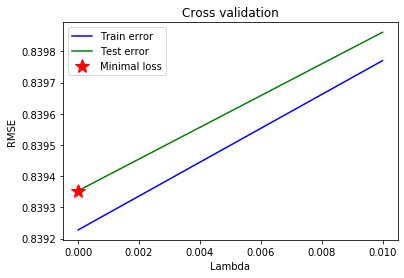

 Best value of lambda = 6.866488450043588e-13 
 Loss = 0.8393535579346099 
 Weights = [-3.14661373e-01  3.08093848e-02 -2.58839450e-01 -2.72778072e-01
 -2.51311679e-02  2.72788173e-01 -3.50558714e-02 -3.39160775e+02
 -1.90145725e-01  1.24797544e-01  6.58900767e+01 -7.94402850e-04
 -8.85658823e-04  6.49701158e+01 -8.91362666e-04  2.28456463e-03
  1.18243184e-01  8.07938942e-04 -7.39016261e-02  6.59529694e-02
  8.65517199e-02 -2.94950677e-02 -1.67636067e-02  2.87239256e+02]


In [47]:
from cross_validation import cross_validation
from cost import compute_loss_rmse

w_initial = np.random.rand(num_features)
lambdas = np.logspace(-500, -2, 50)
k_fold = 4
seed = 6

# prepare storage of the mean of the weights and rmse for train and test data
ws = np.zeros((num_features, len(lambdas)))
rmse_train = []
rmse_test = []

for ind, lambda_ in enumerate(lambdas):
    # prepare storage of weights and rmse for train and test data for each fold
    ws_tmp = np.zeros((num_features, k_fold))
    rmse_tr = []
    rmse_te = []
    # cross-validation
    for i,k in enumerate(range(k_fold)):
        tx_train, y_train, tx_test, y_test = cross_validation(y, tx, k, k_fold, seed)
        w,_ = ridge_regression(y_train, tx_train, lambda_)
        # store weights and rmse for train and test data for each fold
        ws_tmp[:, i] = w
        rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
        rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
    # store the mean of the weights and rmse for train and test data
    ws[:, ind] = np.mean(ws_tmp, 1)
    rmse_train.append(np.mean(rmse_tr))
    rmse_test.append(np.mean(rmse_te))
    
loss = np.amin(rmse_test)
weights = ws[:, np.argmin(rmse_test)]
lambda_star = lambdas[np.argmin(rmse_test)]

plt.plot(lambdas, rmse_train, color='b', label="Train error")
plt.plot(lambdas, rmse_test, color='g', label="Test error")
plt.plot(lambda_star, loss, 'r*', markersize=15, label="Minimal loss")
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title("Cross validation")
plt.legend()
plt.show()

print(" Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
    g=lambda_star, l=loss, we = weights))

### Polynomial regression

In [ ]:
from cross_validation import cross_validation
from cost import compute_loss_rmse

w_initial = np.random.rand(num_features)
degree = 7
lambdas = np.logspace(-500, -2, 50)
k_fold = 4
seed = 6

# prepare storage of the mean of the weights and rmse for train and test data
ws = np.zeros((num_features, len(lambdas)))
rmse_train = []
rmse_test = []

for ind, lambda_ in enumerate(lambdas):
    # prepare storage of weights and rmse for train and test data for each fold
    ws_tmp = np.zeros((num_features, k_fold))
    rmse_tr = []
    rmse_te = []
    # cross-validation
    for i,k in enumerate(range(k_fold)):
        tx_tr, y_train, tx_te, y_test = cross_validation(y, tx, k, k_fold, seed)
        #form data with polynomial degree
        tx_train = build_poly(tx_tr, degree)
        tx_test = build_poly(tx_te, degree)
        #ridge regression
        w,_ = ridge_regression(y_train, tx_train, lambda_)
        # store weights and rmse for train and test data for each fold
        ws_tmp[:, i] = w
        rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
        rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
    # store the mean of the weights and rmse for train and test data
    ws[:, ind] = np.mean(ws_tmp, 1)
    rmse_train.append(np.mean(rmse_tr))
    rmse_test.append(np.mean(rmse_te))
    
loss = np.amin(rmse_test)
weights = ws[:, np.argmin(rmse_test)]
lambda_star = lambdas[np.argmin(rmse_test)]

plt.plot(lambdas, rmse_train, color='b', label="Train error")
plt.plot(lambdas, rmse_test, color='g', label="Test error")
plt.plot(lambda_star, loss, 'r*', markersize=15, label="Minimal loss")
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title("Cross validation")
plt.legend()
plt.show()

print(" Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
    g=lambda_star, l=loss, we = weights))

## Generate predictions and save ouput in csv format for submission:

In [20]:
DATA_TEST_PATH = 'data/test.csv'
ytest, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test = np.delete(tX_test, indices, axis=1)
_, tx_test = build_model_data(tX_test,ytest)

In [21]:
OUTPUT_PATH = 'data/submission_ridge.csv'
y_pred = predict_labels(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)